# HW6

The goal of this HW is to use decision trees to find what made it more or less likely to survive the Titanic sinking in 1912.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
#%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

In [3]:
print(sns.__version__)

0.13.2


### If your seaborn version is below 0.13.x, then you need to update your Seaborn library by un-comment out the code then execute the following cmd

In [6]:
#pip install --upgrade seaborn

## Cleaning

We will start by cleaning the data set. This part is already done it for you. So, you should just execute the code below.

In [10]:
df = pd.read_csv("titanic.csv")

Get rid of useless attributes

In [13]:
df.drop(['Name', 'Ticket', 'PassengerId', 'Cabin'], axis=1, inplace=True)

Binarize gender

In [16]:
df['Male'] = df.Sex == 'male'

In [18]:
df.drop(['Sex'], axis=1, inplace=True)

Make dummy variables for port of origin

In [21]:
df = pd.get_dummies(data=df,columns=['Embarked'])

Remove the nulls

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Male        891 non-null    bool   
 7   Embarked_C  891 non-null    bool   
 8   Embarked_Q  891 non-null    bool   
 9   Embarked_S  891 non-null    bool   
dtypes: bool(4), float64(2), int64(4)
memory usage: 45.4 KB


In [26]:
df.isna().any()

Survived      False
Pclass        False
Age            True
SibSp         False
Parch         False
Fare          False
Male          False
Embarked_C    False
Embarked_Q    False
Embarked_S    False
dtype: bool

In [28]:
df.Age.isna().sum()

177

In [30]:
len(df)

891

In [32]:
df.dropna(inplace=True)

In [34]:
len(df)

714

In [36]:
len(df) + 177 == 891

True

In [38]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,False,True
1,1,1,38.0,1,0,71.2833,False,True,False,False
2,1,3,26.0,0,0,7.9250,False,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,False,True


## Data set description
After cleaning, we have a DataFrame df, which reports the passengers of the Titanic (one row per passenger). The columns are:
<ul>
<li><b>Survived</b>: binary attribute that indicates whether the passenger survived. This is the dependent variable that we will attempt to explain
<li><b>Pclass</b>: Ticket class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
<li><b>Age</b>: Passenger age
<li><b>SibSp</b>: The amout of the passenger's siblings/spouses aboard the Titanic
<li><b>Parch</b>: The amout of the passenger's parents/children aboard the Titanic
<li><b>Fare</b>: The ticket fare
<li><b>Male</b>: binary attibute that indicates the gender (1=Male, 0=Female)
<li><b>Embarked_C</b>: binary attibute that indicates whether the passenger embarked in Cherbourg
<li><b>Embarked_Q</b>: binary attibute that indicates whether the passenger embarked in Queenstown
<li><b>Embarked_S</b>: binary attibute that indicates whether the passenger embarked in Southampton
</ul>

### Question 1

<b>Build</b> and <b>show</b> a decision tree of <b>depth = 1</b> (i.e., one root and two leaf nodes) to find the differences between those who survived and those who didn't. (In Camino, pick the answer with the right description)

In [43]:
X= df.drop('Survived',axis=1)

In [45]:
Y = df.Survived

In [47]:
dt = tree.DecisionTreeClassifier(max_depth=1)

In [49]:
dt.fit(X,Y)

DecisionTreeClassifier(max_depth=1)

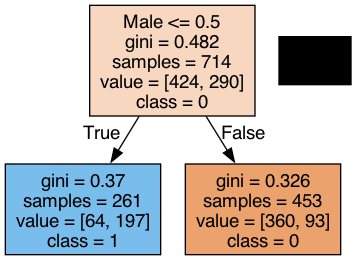

In [51]:
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]

tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,\
    filled=True) 

graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

Or ...

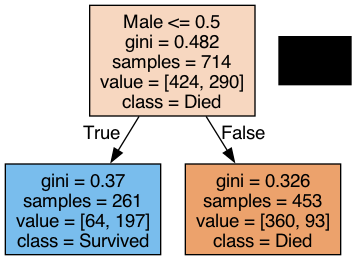

In [54]:
dt_feature_names = list(X.columns)
# target_names: [0=Died, 1=Survived]
dt_target_names = ['Died', 'Survived']

tree.export_graphviz(dt, out_file='decisiontree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)

graph = pydotplus.graph_from_dot_file('decisiontree.dot')
Image(graph.create_png())

### Question 2

In **at most 10 words**, explain what the decision tree tells us. Write your answer in a markdown cell. (In Camino, fill the same sentence into the blank)

<b>Answer:</b> Females have a much higher probability of survival than males

### Question 3

Use **one** seaborn command to draw a bar chart to **statistically** validate what you found in the previous question. (In Camino, fill in the program code line you used) 

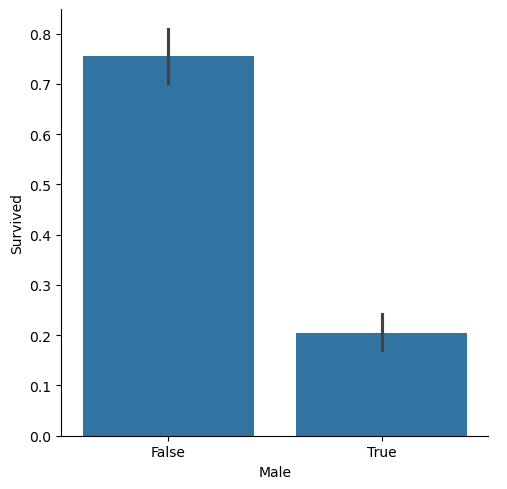

In [61]:
sns.catplot(x='Male',y='Survived',data=df,kind='bar')

### Question 4

<b>Build</b> and <b>show</b> a decision tree of <b>depth = 2</b> to find the differences between those who survived and those who didn't. Your tree should have four leaves. (In Camino, pick the 3 attributes/predictors decision tree used to build the tree.)

In [65]:
dt = tree.DecisionTreeClassifier(max_depth = 2)
dt.fit(X,Y)

DecisionTreeClassifier(max_depth=2)

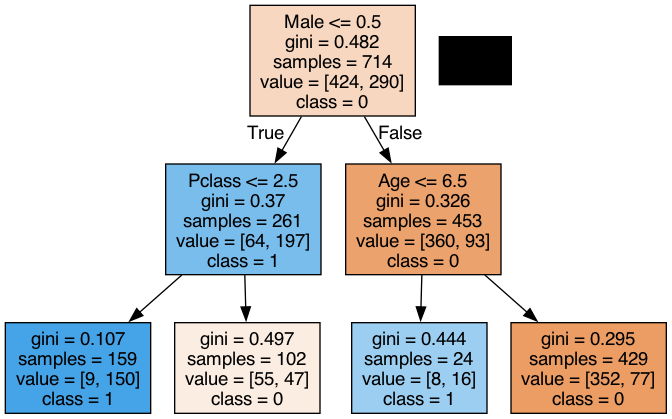

In [68]:

# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

### Question 5

The tree found in your previous question should involve three predictors. Guided from what the tree tells you, detect an interesting finding involving <b>two</b> of these three predictors and show its validity through seaborn. 
<p><b>Format and grading:</b> For this question, you will be graded on <b>the first two Jupyter cells following this cell</b> (<b>the following cells will be ignored, without exception</b>). The first cell following this cell must be a markdown cell with your finding written in English. The second cell must contain the code that builds a seaborn chart: this chart must <b>statistically</b> validate your finding. 

### Q5.1,  First solution (right side of tree) (In Camino, fill in the seaborn command you used to draw the chart)

Markdown cell:

Females have a higher chance of surviving than males; however, this is true only for people older than 6.5.

Code cell:

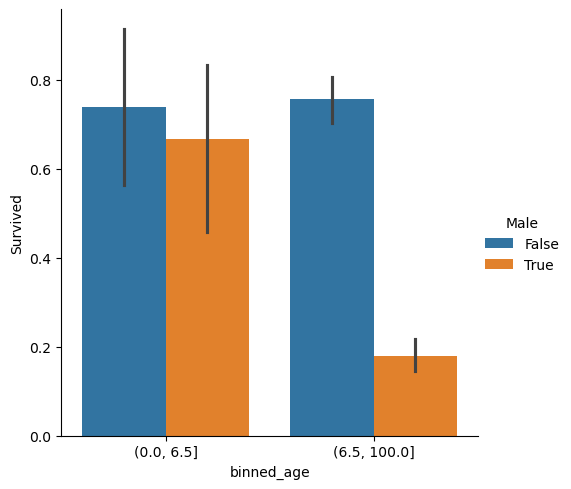

In [76]:
df['binned_age'] = pd.cut(df.Age,bins=[0,6.5,100])
sns.catplot(x='binned_age', y='Survived',hue='Male', data=df,kind='bar')

### Q5.2, Second solution (left side of tree) (In Camino, fill in the seaborn command you used to draw the chart)

Females in third class have a smaller chance of surviving that females in first or second class.

In [80]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Male,Embarked_C,Embarked_Q,Embarked_S,binned_age
0,0,3,22.0,1,0,7.2500,True,False,False,True,"(6.5, 100.0]"
1,1,1,38.0,1,0,71.2833,False,True,False,False,"(6.5, 100.0]"
2,1,3,26.0,0,0,7.9250,False,False,False,True,"(6.5, 100.0]"
3,1,1,35.0,1,0,53.1000,False,False,False,True,"(6.5, 100.0]"
4,0,3,35.0,0,0,8.0500,True,False,False,True,"(6.5, 100.0]"


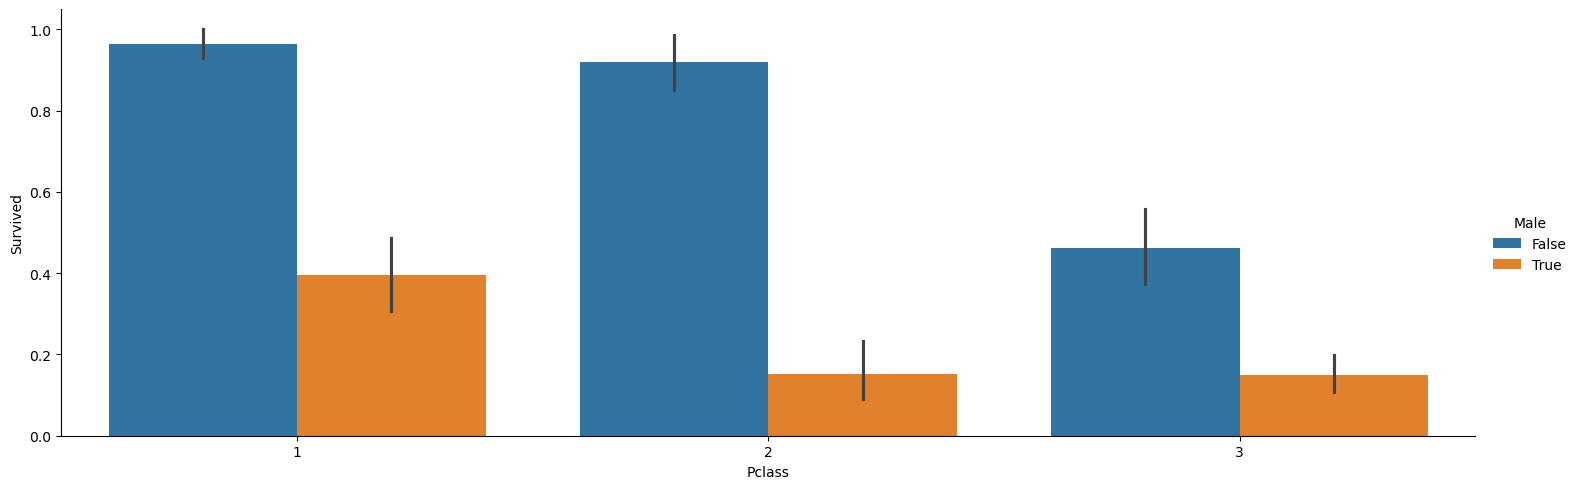

In [82]:
sns.catplot(x='Pclass',y='Survived',hue = 'Male', data=df,aspect = 3, kind='bar')